In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(n_samples=1000, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5, random_state=42)

In [3]:
# Apply OPTICS clustering
db = OPTICS(max_eps=2.0, min_samples=22, cluster_method='xi', metric='minkowski').fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels[labels != -1]))  # Exclude noise points
no_noise = np.sum(labels == -1)

In [4]:
print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')

Estimated no. of clusters: 2
Estimated no. of noise points: 461


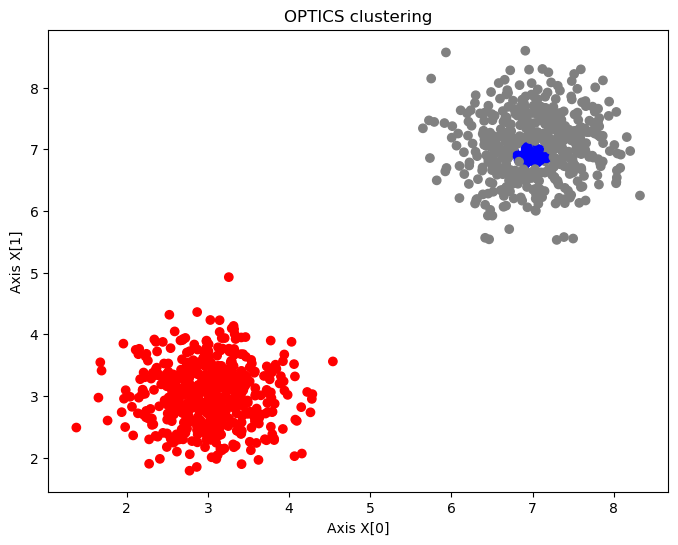

In [9]:
# Plot clustering results
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' if label == 1 else 'gray' for label in labels]
plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o")
plt.title('OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

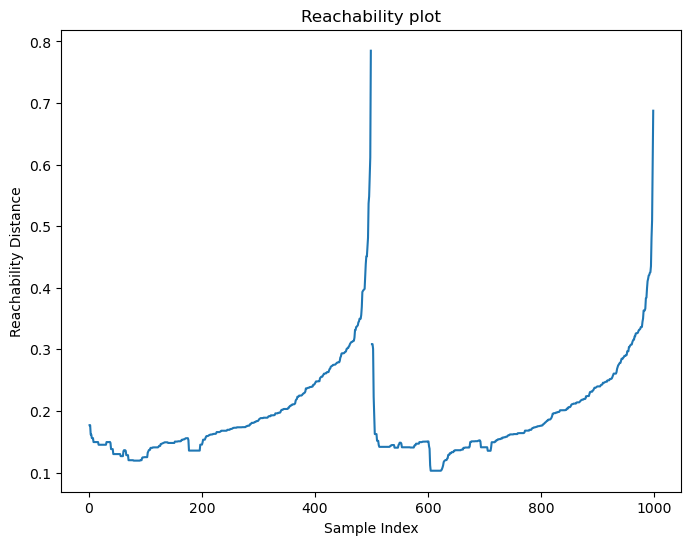

In [6]:
# Generate reachability plot
plt.figure(figsize=(8, 6))
plt.plot(db.reachability_[db.ordering_])
plt.title('Reachability plot')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.show()